In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! unzip /content/drive/MyDrive/Cutout_Files.zip

Archive:  /content/drive/MyDrive/Cutout_Files.zip
replace Cutout Files/galaxy/IC3521-H01_1260_751_3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Cutout Files/galaxy/IC3521-H01_1260_751_3.jpg  
replace Cutout Files/galaxy/IC3521-H01_1300_759_3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Cutout Files/galaxy/IC3521-H01_1300_759_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1326_1169_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1361_946_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1399_1031_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1449_1243_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1536_1206_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1014_1208_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1195_791_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1372_890_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1519_1266_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1821_1270_3.jpg  
  inflating: Cutout Files/

In [ ]:
import cv2
import numpy as np
import glob
data = []
labels = []

galaxy_path = glob.glob('/content/Cutout Files/galaxy/*')
star_path = glob.glob('/content/Cutout Files/star/*')

# galaxy images: label 0
i = 0
for x in galaxy_path:
    image = cv2.imread(x, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data.append(image)
    labels.append(0)

# star images: label 1
for x in star_path:
    image = cv2.imread(x, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data.append(image)
    labels.append(1)

data = np.array(data)/255
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

train_data, temp_data, train_labels, temp_labels = train_test_split(data, labels, test_size=0.4, random_state=42)
test_data, valid_data, test_labels, valid_labels = train_test_split(temp_data, temp_labels, test_size=0.5, random_state=42)

In [ ]:
train_data.shape

(2391, 64, 64)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reshape the data for KNN (assuming each image is flattened)
train_data_flatten = train_data.reshape(train_data.shape[0], -1)
test_data_flatten = test_data.reshape(test_data.shape[0], -1)
valid_data_flatten = valid_data.reshape(valid_data.shape[0], -1)



In [ ]:
k=np.arange(1,10,2)

Knn=[]
for i in k:
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  #p=1 for manthattan distance(L1-distance)
  Knn.append(knn_classifier)


In [ ]:
accuracy=[]
for i in range(len(Knn)):
  Knn[i].fit(train_data_flatten, train_labels)

  y_pred_test= Knn[i].predict(test_data_flatten)
  accuracy_test= accuracy_score(test_labels, predictions)
  accuracy.append(accuracy_test)
  print(f'')
  print(f'for K= {k[i]} and Acuuracy is {accuracy_test} \n')


for K= 1 and Acuuracy is 0.7854454203262233 


for K= 3 and Acuuracy is 0.7854454203262233 


for K= 5 and Acuuracy is 0.7854454203262233 


for K= 7 and Acuuracy is 0.7854454203262233 


for K= 9 and Acuuracy is 0.7854454203262233 



Text(0, 0.5, 'Accuracy')

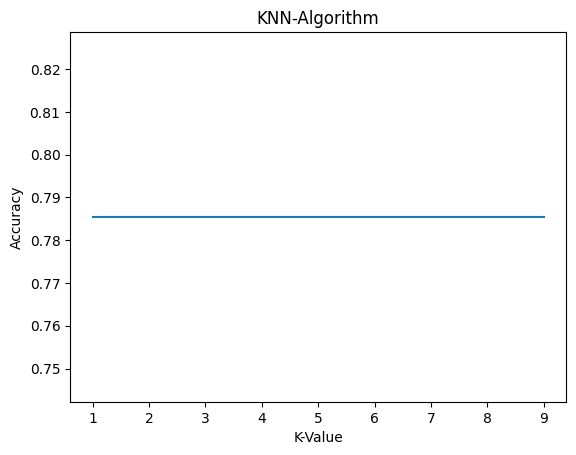

In [ ]:
#---------------------- PLOTTING ALL K-Value V/S Accuracy---------------------------------
import matplotlib.pyplot as plt
plt.plot(k,accuracy)
plt.title("KNN-Algorithm")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')

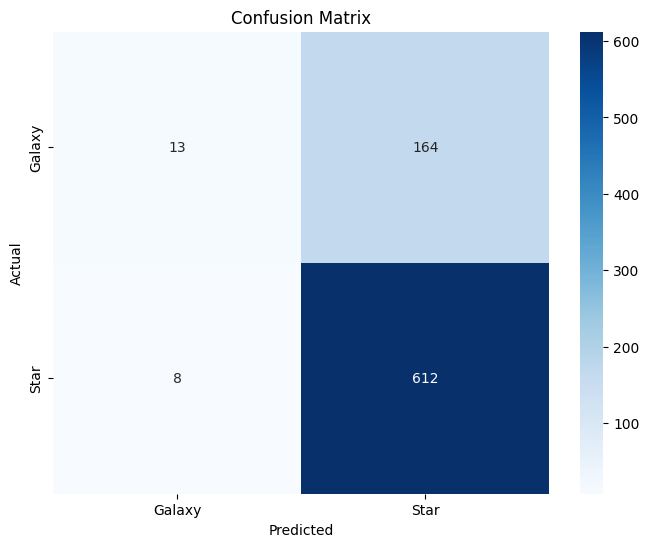

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(test_labels, y_pred_test)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Galaxy', 'Star'], yticklabels=['Galaxy', 'Star'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:
TP = 13
TN = 612
FP = 164
FN = 8

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.07344632768361582
Recall: 0.6190476190476191
F1 Score: 0.13131313131313133
